#FINAL REPORT

Course: Applied Parallel Programming  
21120449 - Nguyễn Văn Hậu  
21120464 - Nguyễn Quốc Hưng  
[GitHub](https://github.com/NguyenQuocHung47/APP)

# Image Sharpening

## I. Mô tả

### 1. Tổng quan
Trong xử lý ảnh, image sharpening giúp làm nổi bật chi tiết, cải thiện độ rõ nét của các đối tượng và biên trong ảnh. Tuy nhiên, các phương pháp làm sắc nét truyền thống như **Unsharp Masking** có thể gây ra hiệu ứng **halo**, làm xuất hiện các viền sáng/tối không tự nhiên quanh biên ảnh. Để khắc phục vấn đề này, chúng ta cần áp dụng các kỹ thuật phức tạp hơn bảo toàn chi tiết mà không gây nhiễu.  
Đâu vào : Ảnh định dạng jpg  
Đầu ra : Ảnh được tăng cường độ sắc nét

## 2. Chi tiết  
Phương pháp: sử dụng kết hợp Gaussian Blur và [High-Frequency Detail-Preserving Contrast Enhancement](https://www.semanticscholar.org/reader/3b7a0d22d805d3671b8412aaf62d955d44d02c5b)    
**High-Frequency Detail-Preserving Contrast Enhancement** được tham khảo từ bài nghiên cứu [An Efficient and Self-Adapted Approach to
the Sharpening of Color Images](https://www.semanticscholar.org/reader/3b7a0d22d805d3671b8412aaf62d955d44d02c5b)- Lih-Jen Kau,Tien-Lin Lee, được xuất bản trên tạp chí The Scientific World Journal năm 2013, đề xuất một phương pháp làm sắc nét ảnh màu hiệu quả và tự thích ứng. Phương pháp này tập trung vào việc tăng cường độ sắc nét của ảnh màu trong khi vẫn bảo toàn các chi tiết quan trọng và không gây ra hiệu ứng halo, chỉ sử dụng kênh Value để làm sắc nét ảnh.  

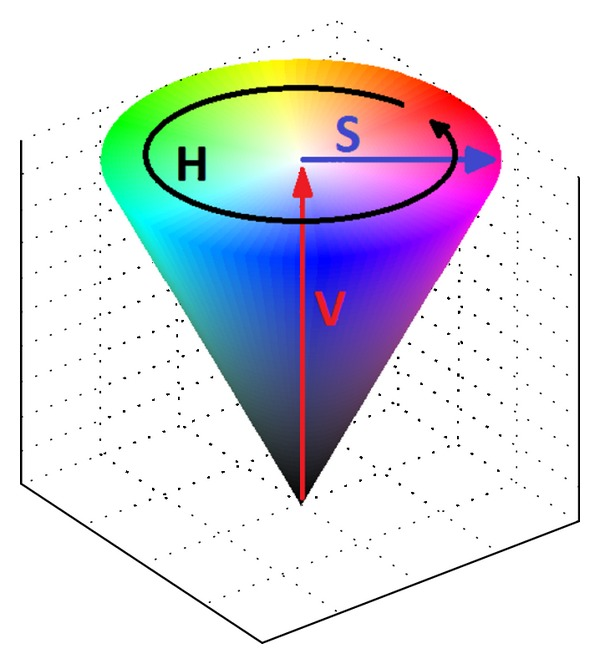



### Các bước thực hiện

- Chuyển đổi RGB -> HSV
- Gaussian Blur
- Edge Detection cho kênh Value
- Low-pass Filtering
- Tính toán additive magnitude  
- Edge sharpen  
- Chuyển đổi HSV -> RGB

### Phân tích thuật toán
**1. Chuyển đổi RGB -> HSV**   
Ban đầu, hình ảnh  được biểu diễn bằng định dạng màu RGB. Do đó phải chuyển đổi sang không gian màu HSV để thực hiện quá trình làm sắc nét hình ảnh.  
Trước khi chuyển đổi, 3 thành phần RGB sẽ được chuẩn hóa về [0,1].  
Mỗi pixel của ảnh RGB được chuyển sang không gian màu HSV bằng công thức:  
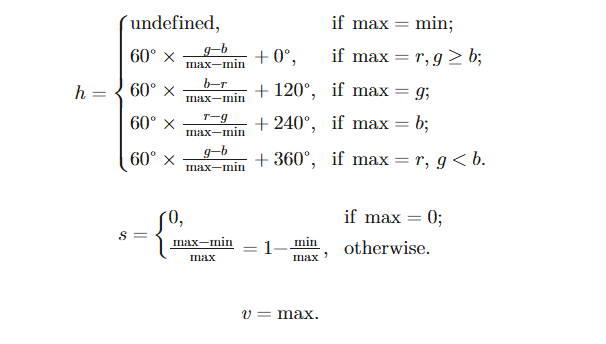


**2. Gaussian Blur**  
Giảm nhiễu trong ảnh trước khi thực hiện phát hiện biên.  
Làm mượt các vùng có biến đổi nhẹ để tránh phát hiện sai biên do nhiễu.  
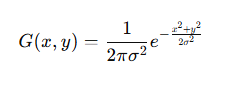

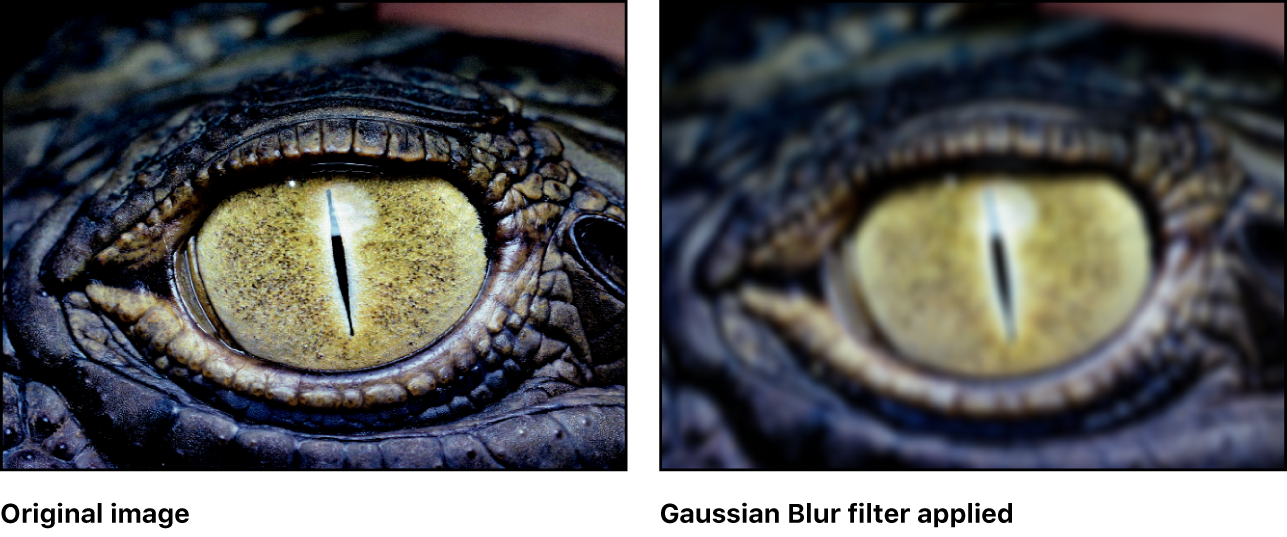

**3. Edge Detection**  
Xác định các khu vực có sự thay đổi mạnh về cường độ sáng (biên của vật thể).  
Sử dụng trên kênh V (Value) trong không gian màu HSV.  

chúng ta xác định xem mỗi pixel có phải là cạnh hay không bằng cách kiểm tra các lân cận trên và trái. Nếu một trong 2 lân cận của nó có sự khác biệt vượt quá ngưỡng nhất định, pixel này là biên.
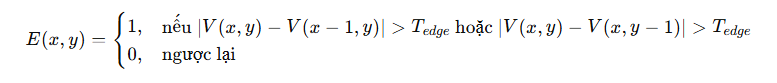



Đầu vào là một hình ảnh HSV và đầu ra là một hình ảnh biên 0-1 chỉ có 1 giá trị. Giá trị 1 trong đầu ra cho biết pixel là một biên.

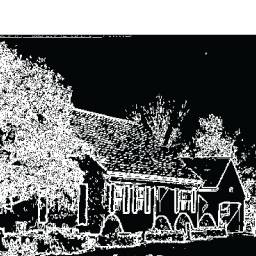

*Kết quả trả về dự kiến*

**4. Low-pass filtering**  
Tiếp tục làm việc trên ảnh cạnh từ giai đoạn trước và sử dụng **Low-pass filtering** lọc ra các pixel cạnh bị cô lập. Đối với mỗi pixel đã được đánh dấu là cạnh, đếm số lượng 8 lân cận. Nếu số đếm nhỏ hơn ngưỡng nhất định, pixel này sẽ được đánh dấu là không phải cạnh.  
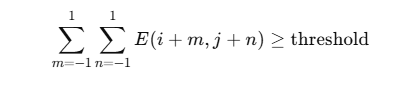


**5. Tính toán độ lớn cộng gộp (?) - additive magnitude**  
Xác định độ lớn cộng gộp tối đa - maximum additive magnitude. Giá trị sẽ được sử dụng để điều chỉnh Value trên pixel của nó. Tính bằng giá trị tối đa, tối thiểu và trung bình trên toàn bộ hình ảnh HSV.  
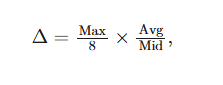

**6. Làm sắc nét dựa trên biên**  
Tính toán giá trị trung bình cục bộ xung quanh vùng lân cận 9 pixel của mỗi pixel (bao gồm cả chính nó) và điều chỉnh Value theo **Additive Magnitude** và **Scale**. **Scale** có giá trị [0-1] cho biết mức độ sắc nét.  
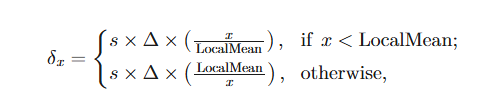


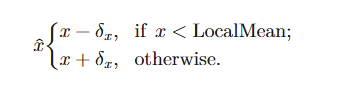

**7. Chuyển đổi HSV -> RGB**


## II. Câu hỏi hàng tuần

####  Tuần 1

**Q1:** Tại sao khi chuyển đổi RGB -> HSV, h = underfined nếu max = min?

**Answer:** Khi chuyển đổi RGB -> HSV, nếu ba thành phần R, G và B tại một điểm ảnh bằng nhau, ta có max = min. 
Khi đó, ảnh tại điểm đó là màu xám trung tính và không biểu hiện một tông màu cụ thể nào. 
Điều này làm cho thành phần H trở nên không xác định về mặt toán học, do công thức tính H có chứa phép chia cho (max - min), vốn sẽ bằng 0 trong trường hợp này -> H tại những điểm ảnh có màu xám = undefined

**Q2:** Kế hoạch của nhóm sẽ song song hóa nó nhanh gấp bao nhiêu lần so với cài đặt tuần tự?

**Answer:** 

**Q3:** Sự khác biệt giữa Image Sharpening và Image Smoothing là gì?

**Answer:** 
Image Smoothing (làm mịn ảnh) dùng với mục đích giảm nhiễu ảnh và làm cho hình ảnh "mượt" hơn. Trong điều kiện ánh sáng yếu hoặc môi trường không ổn định, hình ảnh có thể xuất hiện nhiều nhiễu (noise). Việc làm mịn giúp làm mờ các chi tiết nhỏ hoặc các vùng nhiễu bằng cách tính toán trung bình hoặc trung vị giá trị các điểm ảnh lân cận. Các thuật toán thường được sử dụng cho smoothing bao gồm Gaussian Blur, Median Filter và Bilateral Filter. 

Image Sharpening (làm sắc nét ảnh) là tăng cường chi tiết, đặc biệt là các đường biên và cạnh trong ảnh. Khi một ảnh bị mờ hoặc thiếu độ tương phản, kỹ thuật sharpen sẽ giúp làm nổi bật các chuyển tiếp mạnh mẽ giữa các vùng sáng – tối, từ đó giúp ảnh trở nên rõ ràng và sắc nét hơn. Việc làm sắc thường dựa trên các toán tử tính để khuếch đại các thành phần tần số cao trong ảnh. 

**Q4:** Dự án có tích hợp kỹ thuật làm sắc nét này vào một ứng dụng thực tế nào không, ví dụ như phần mềm chỉnh sửa ảnh

**Answer:** Hiện tại nhóm mình chỉ thực hiện hoàn toàn trên Notebook. Trong tương lai, nếu có thời gian, nhóm mình sẽ cân nhắc việc phát triển tiếp một trang web với chức năng tương tự.

## III. Phiên bản tuần tự 

80%

In [2]:
from PIL import Image

def rgb_to_hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    maxc = max(r, g, b)
    minc = min(r, g, b)
    v = maxc


    if minc == maxc:
        return 0.0, 0.0, v
    
    s = (maxc - minc) / maxc
    rc = (maxc - r) / (maxc - minc)
    gc = (maxc - g) / (maxc - minc)
    bc = (maxc - b) / (maxc - minc)

    if r == maxc:
        h = bc - gc
    elif g == maxc:
        h = 2.0 + rc - bc
    else:
        h = 4.0 + gc - rc
    h = (h / 6.0) % 1.0
    return h, s, v

# def rgb_to_hsv(r, g, b):
#     r, g, b = r / 255.0, g / 255.0, b / 255.0
#     cmax = max(r, g, b)
#     cmin = min(r, g, b)
#     delta = cmax - cmin

#     # Hue calculation
#     if delta == 0:
#         h = 0
#     elif cmax == r:
#         h = (60 * ((g - b) / delta) + 360) % 360
#     elif cmax == g:
#         h = (60 * ((b - r) / delta) + 120) % 360
#     elif cmax == b:
#         h = (60 * ((r - g) / delta) + 240) % 360

#     # Saturation calculation
#     s = 0 if cmax == 0 else (delta / cmax)

#     # Value calculation
#     v = cmax

#     return h, s , v

def hsv_to_rgb(h, s, v):
    if s == 0.0:
        return v, v, v
    i = int(h * 6.0)
    f = (h * 6.0) - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))
    i = i % 6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q

def detect_edges(value_channel, threshold):
    height = len(value_channel)
    width = len(value_channel[0])
    edges = [[0] * width for _ in range(height)]
    for i in range(1, height):
        for j in range(1, width):
            if (abs(value_channel[i][j] - value_channel[i - 1][j]) > threshold or
                abs(value_channel[i][j] - value_channel[i][j - 1]) > threshold):
                edges[i][j] = 1
    return edges

def low_pass_filter(edges, neighbor_threshold):
    height = len(edges)
    width = len(edges[0])
    filtered_edges = [[edges[i][j] for j in range(width)] for i in range(height)]
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if edges[i][j] == 1:
                neighbor_count = sum([edges[i + di][j + dj] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) - 1
                if neighbor_count < neighbor_threshold:
                    filtered_edges[i][j] = 0
    return filtered_edges

def calculate_additive_magnitude(value_channel):
    flat_values = [v for row in value_channel for v in row]
    max_v = max(flat_values)
    min_v = min(flat_values)
    avg_v = sum(flat_values) / len(flat_values)
    return (max_v - min_v) * avg_v

def sharpen_edges(hsv_image, edges, additive_magnitude, scale):
    height = len(hsv_image)
    width = len(hsv_image[0])
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if edges[i][j] == 1:
                local_mean = sum([hsv_image[i + di][j + dj][2] for di in [-1, 0, 1] for dj in [-1, 0, 1]]) / 9.0
                delta = scale * additive_magnitude * (hsv_image[i][j][2] - local_mean)
                hsv_image[i][j][2] = min(1.0, max(0.0, hsv_image[i][j][2] + delta))
    return hsv_image

def process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale):
    input_image = Image.open(input_path)
    width, height = input_image.size
    rgb_image = input_image.convert('RGB')

    hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r , g , b )
            hsv_image[i][j] = [h, s, v]

    value_channel = [[hsv_image[i][j][2] for j in range(width)] for i in range(height)]
    edges = detect_edges(value_channel, edge_threshold)

    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(edges[i][j] * 255))
    edge_image.save('edges_detected0.jpg')

    filtered_edges = low_pass_filter(edges, neighbor_threshold)

    edge_image = Image.new('L', (width, height))
    for i in range(height):
        for j in range(width):
            edge_image.putpixel((j, i), int(filtered_edges[i][j] * 255))
    edge_image.save('edges_detected.jpg')

    additive_magnitude = calculate_additive_magnitude(value_channel)
    sharpened_hsv_image = sharpen_edges(hsv_image, filtered_edges, additive_magnitude, scale)

    output_image = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            h, s, v = sharpened_hsv_image[i][j]
            r, g, b = hsv_to_rgb(h, s, v)
            output_image.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))

    output_image.save(output_path)

input_path = 'image.jpg'
output_path = 'sharpened_image.jpg'
edge_threshold = 0.015
neighbor_threshold = 2
scale = 1.0

process_image(input_path, output_path, edge_threshold, neighbor_threshold, scale)


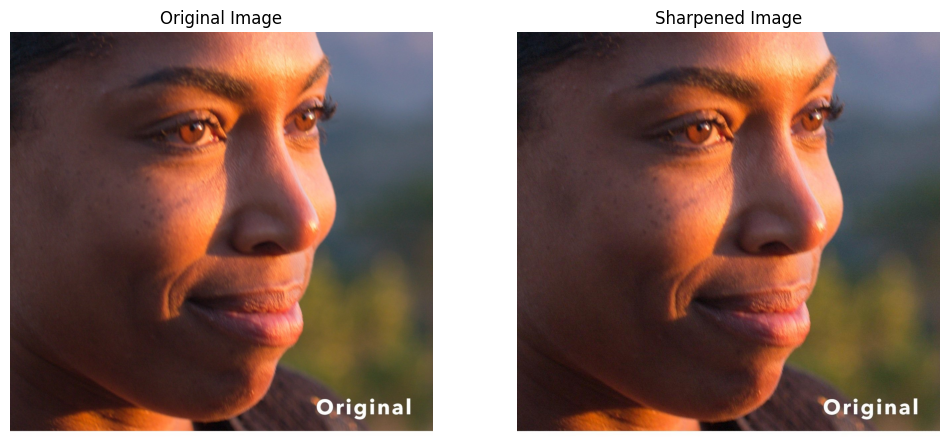

In [3]:
import matplotlib.pyplot as plt
original = Image.open(input_path)
sharpened = Image.open(output_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened)
plt.axis('off')

plt.show()

In [4]:
import numpy as np
print(original.size)
print(sharpened.size)
original = Image.open('image.jpg').convert('RGB')
original_np = np.array(original)
sharpened = Image.open('sharpened_image.jpg').convert('RGB')
sharpened_np = np.array(sharpened)
diff = np.abs(original_np.astype(int) - sharpened_np.astype(int))
diff = np.clip(diff*10, 0, 255)
diff_image = Image.fromarray(np.uint8(diff))
diff_image.show()
diff_image.save('diff.jpg')


(1272, 1222)
(1272, 1222)


In [5]:
from PIL import Image, ImageFilter
import numpy as np

def rgb_to_hsv(r, g, b):
    r, g, b = r/255., g/255., b/255.
    cmax, cmin = max(r, g, b), min(r, g, b)
    v = cmax
    delta = cmax - cmin

    if delta == 0:
        h = 0
    elif cmax == r:
        h = (60 * ((g - b) / delta) + 360) % 360
    elif cmax == g:
        h = (60 * ((b - r) / delta) + 120) % 360
    else:
        h = (60 * ((r - g) / delta) + 240) % 360

    s = 0 if cmax == 0 else delta / cmax
    return h / 360.0, s, v  # h chuẩn hóa về [0, 1]

def hsv_to_rgb(h, s, v):
    h = h * 360
    if s == 0.0:
        return v, v, v
    i = int(h / 60.0)
    f = (h / 60.0) - i
    p = v * (1 - s)
    q = v * (1 - s * f)
    t = v * (1 - s * (1 - f))
    i = i % 6
    if i == 0: return v, t, p
    if i == 1: return q, v, p
    if i == 2: return p, v, t
    if i == 3: return p, q, v
    if i == 4: return t, p, v
    if i == 5: return v, p, q

def unsharp_mask_on_v(input_path, output_path, blur_radius=2, amount=1.5):
    image = Image.open(input_path).convert('RGB')
    width, height = image.size

    # Tách HSV
    hsv_image = []
    for y in range(height):
        row = []
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            row.append(rgb_to_hsv(r, g, b))
        hsv_image.append(row)

    # Lấy kênh V (value)
    v_channel = np.array([[hsv_image[y][x][2] for x in range(width)] for y in range(height)], dtype=np.float32)

    # Làm mờ V bằng Gaussian blur
    v_image = Image.fromarray(np.uint8(v_channel * 255)).filter(ImageFilter.GaussianBlur(radius=blur_radius))
    blurred_v = np.array(v_image, dtype=np.float32) / 255.0

    # Unsharp Masking: detail = original - blurred, then add back
    mask = v_channel - blurred_v
    sharpened_v = np.clip(v_channel + amount * mask, 0.0, 1.0)

    # Gắn lại vào HSV
    for y in range(height):
        for x in range(width):
            h, s, _ = hsv_image[y][x]
            hsv_image[y][x] = (h, s, sharpened_v[y, x])

    # Chuyển HSV → RGB và tạo ảnh đầu ra
    output = Image.new('RGB', (width, height))
    for y in range(height):
        for x in range(width):
            h, s, v = hsv_image[y][x]
            r, g, b = hsv_to_rgb(h, s, v)
            output.putpixel((x, y), (int(r * 255), int(g * 255), int(b * 255)))

    output.save(output_path)
    print(f"Đã lưu ảnh sắc nét: {output_path}")

# Gọi hàm
unsharp_mask_on_v('image.jpg', 'sharpened_image.jpg', blur_radius=2, amount=1.5)


Đã lưu ảnh sắc nét: sharpened_image.jpg


In [6]:
def combined_sharpening(input_path, output_path, blur_radius=2, amount=1.5, edge_threshold=0.015, neighbor_threshold=2, scale=1.0):
    image = Image.open(input_path).convert('RGB')
    width, height = image.size

    # Chuyển RGB → HSV
    hsv_image = [[[0, 0, 0] for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            r, g, b = image.getpixel((j, i))
            h, s, v = rgb_to_hsv(r, g, b)
            hsv_image[i][j] = [h, s, v]

    # Tách kênh V
    v_channel = np.array([[hsv_image[i][j][2] for j in range(width)] for i in range(height)], dtype=np.float32)

    # Unsharp Masking trên kênh V
    v_blurred = Image.fromarray(np.uint8(v_channel * 255)).filter(ImageFilter.GaussianBlur(radius=blur_radius))
    blurred_v = np.array(v_blurred, dtype=np.float32) / 255.0
    mask = v_channel - blurred_v
    v_usm = np.clip(v_channel + amount * mask, 0.0, 1.0)

    # Cập nhật lại hsv_image với v_usm
    for i in range(height):
        for j in range(width):
            hsv_image[i][j][2] = v_usm[i, j]

    # Edge detection từ kênh V sau unsharp
    edges = detect_edges(v_usm.tolist(), edge_threshold)
    edges_filtered = low_pass_filter(edges, neighbor_threshold)
    additive_magnitude = calculate_additive_magnitude(v_usm.tolist())

    # Làm sắc nét theo vùng biên
    sharpened_hsv = sharpen_edges(hsv_image, edges_filtered, additive_magnitude, scale)

    # Chuyển HSV → RGB
    output = Image.new('RGB', (width, height))
    for i in range(height):
        for j in range(width):
            h, s, v = sharpened_hsv[i][j]
            r, g, b = hsv_to_rgb(h, s, v)
            output.putpixel((j, i), (int(r * 255), int(g * 255), int(b * 255)))

    output.save(output_path)
    print(f"Kết hợp Unsharp + Edge sharpening đã lưu vào: {output_path}")
combined_sharpening('image.jpg', 'sharpened_image1.jpg', blur_radius=2, amount=1.5)

highlighted = np.where(np.abs(original_np - sharpened_np) > 15, 255, original_np)
Image.fromarray(np.uint8(highlighted)).show()

Kết hợp Unsharp + Edge sharpening đã lưu vào: sharpened_image1.jpg


In [7]:
import numpy as np
print(original.size)
print(sharpened.size)
original = Image.open('sharpened_image.jpg').convert('RGB')
original_np = np.array(original)
sharpened = Image.open('sharpened_image1.jpg').convert('RGB')
sharpened_np = np.array(sharpened)
diff = np.abs(original_np.astype(int) - sharpened_np.astype(int))
diff = np.clip(diff*10, 0, 255)
diff_image = Image.fromarray(np.uint8(diff))
diff_image.show()
diff_image.save('diff.jpg')

(1272, 1222)
(1272, 1222)
